<a href="https://colab.research.google.com/github/Sathish1505/Car-Price-Prediction-Practice-/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('train-data.csv',index_col=0)

In [2]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36


In [4]:
df1=df.drop('New_Price',axis=1)

In [5]:
df1['Name']=df1['Name'].str.lower()

In [6]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
z='maruti wagon r lxi cng'
z.split(' ')[0:2]
sep=' '
sep.join(z.split(' ')[0:2])

'maruti wagon'

In [8]:
def name(z):
  sep=' '
  return sep.join(z.split(' ')[0:2])


In [9]:
name('hyundai creta 1.6 crdi sx option')

'hyundai creta'

In [10]:
df1['Name']=df1['Name'].apply(name)

In [11]:
len(df1['Name'].unique())

215

In [12]:
df1['Year']=2024-df['Year']

In [13]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,maruti wagon,Mumbai,14,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,hyundai creta,Pune,9,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,honda jazz,Chennai,13,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,maruti ertiga,Chennai,12,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,audi a4,Coimbatore,11,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
def Engine(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [15]:
Engine('1582 CC')

1582.0

In [16]:
df1['Engine']=df1['Engine'].apply(Engine)

In [17]:
def Mileage(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [18]:
Mileage('20.77 kmpl')

20.77

In [19]:
df1['Mileage']=df1['Mileage'].apply(Mileage)

In [20]:
def power(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [21]:
power('126.2 bhp')

126.2

In [22]:
df1['Power']=df1['Power'].apply(power)

In [23]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,maruti wagon,Mumbai,14,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,hyundai creta,Pune,9,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,13,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,12,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,11,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [24]:
df1.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [25]:
df1['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


In [26]:
df2=df1[~df1['Fuel_Type'].isin(['CNG','LPG','Electric'])]

In [27]:
df2['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3205
Petrol,2746


In [28]:
df2.groupby('Transmission')['Mileage'].mean()

,Mileage
Transmission,
Automatic,15.719674
Manual,19.015923


In [29]:
dfm0=df2[df2['Mileage']==0]
dfm1=df2[df2['Mileage']!=0]

In [30]:
dfm0.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,land rover,Pune,12,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50
67,mercedes-benz c-class,Coimbatore,5,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67
79,hyundai santro,Hyderabad,19,87591,Petrol,Manual,First,0.0,1086.0,0.0,5.0,1.30
194,honda city,Ahmedabad,17,60006,Petrol,Manual,First,0.0,0.0,0.0,NaN,2.95
229,ford figo,Bangalore,9,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60


In [31]:
def replace_0_milage(x):
  if x=='Automatic':
    return 15.719674
  else:
    return 	19.015923


In [32]:
dfm0['Mileage']=dfm0['Transmission'].apply(replace_0_milage)

<ipython-input-32-a102ac5d55fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm0['Mileage']=dfm0['Transmission'].apply(replace_0_milage)


In [33]:
dfm0.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,land rover,Pune,12,85000,Diesel,Automatic,Second,15.719674,2179.0,115.0,5.0,17.50
67,mercedes-benz c-class,Coimbatore,5,15369,Diesel,Automatic,First,15.719674,1950.0,194.0,5.0,35.67
79,hyundai santro,Hyderabad,19,87591,Petrol,Manual,First,19.015923,1086.0,0.0,5.0,1.30
194,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,0.0,0.0,NaN,2.95
229,ford figo,Bangalore,9,70436,Diesel,Manual,First,19.015923,1498.0,99.0,NaN,3.60


In [34]:
df4=pd.concat((dfm0,dfm1))

In [35]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,land rover,Pune,12,85000,Diesel,Automatic,Second,15.719674,2179.0,115.0,5.0,17.50
67,mercedes-benz c-class,Coimbatore,5,15369,Diesel,Automatic,First,15.719674,1950.0,194.0,5.0,35.67
79,hyundai santro,Hyderabad,19,87591,Petrol,Manual,First,19.015923,1086.0,0.0,5.0,1.30
194,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,0.0,0.0,NaN,2.95
229,ford figo,Bangalore,9,70436,Diesel,Manual,First,19.015923,1498.0,99.0,NaN,3.60


In [36]:
df4.groupby('Transmission')['Engine'].mean()

,Engine
Transmission,
Automatic,2088.100698
Manual,1426.765178


In [37]:
dfe0=df4[df4['Engine']==0]
dfe1=df4[df4['Engine']!=0]

In [38]:
def replace_0_engine(x):
  if x== "Automatic":
    return 	2088.100698
  else:
    return 	1426.765178


In [39]:
dfe0['Engine']=dfe0['Transmission'].apply(replace_0_engine)

<ipython-input-39-7de4b2a5db63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe0['Engine']=dfe0['Transmission'].apply(replace_0_engine)


In [40]:
df5=pd.concat((dfe0,dfe1),ignore_index=True)

In [41]:
df5.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,2.95
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,0.0,NaN,26.50
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,0.0,NaN,1.50
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,40.88
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,1.93


In [42]:
dfp0=df5[df5['Power']==0]
dfp1=df5[df5['Power']!=0]

In [43]:
df5

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,2.95
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,0.0,NaN,26.50
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,0.0,NaN,1.50
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,40.88
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,0.0,NaN,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...
5946,maruti swift,Delhi,10,27365,Diesel,Manual,First,28.400000,1248.000000,74.0,5.0,4.75
5947,hyundai xcent,Jaipur,9,100000,Diesel,Manual,First,24.400000,1120.000000,71.0,5.0,4.00
5948,mahindra xylo,Jaipur,12,55000,Diesel,Manual,Second,14.000000,2498.000000,112.0,8.0,2.90
5949,maruti wagon,Kolkata,11,46000,Petrol,Manual,First,18.900000,998.000000,67.1,5.0,2.65


In [44]:
df5.groupby('Transmission')['Power'].mean()

,Power
Transmission,
Automatic,166.083638
Manual,88.793853


In [45]:
def replace_0_power(x):
  if x=='Automatic':
    return 166.083638
  else:
    return 88.793853

In [46]:
dfp0['Power']=dfp0['Transmission'].apply(replace_0_power)

<ipython-input-46-9fd2a61f185c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp0['Power']=dfp0['Transmission'].apply(replace_0_power)


In [47]:
df6=pd.concat((dfp0,dfp1),ignore_index=True)

In [48]:
df6['Seats'].isnull().sum()

42

In [49]:
car_seats=df6.groupby('Name')['Seats'].max()

In [50]:
car_seats['chevrolet beat']
car_seats

,Seats
Name,
ambassador classic,5.0
audi a3,5.0
audi a4,5.0
audi a6,5.0
audi a7,5.0
...,...
volvo s60,5.0
volvo s80,5.0
volvo v40,5.0


In [51]:
def fill_seats(x):
  return car_seats[x]


In [52]:
fill_seats('hyundai xcent')

5.0

In [53]:
dfs0=df6[df6['Seats'].isnull() | (df6['Seats']==0)]
dfs1=df6[~(df6['Seats'].isnull() | (df6['Seats']==0))]

In [54]:
dfs0

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,2.95
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,166.083638,NaN,26.50
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,88.793853,NaN,1.50
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,40.88
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,1.93
5,hyundai santro,Bangalore,13,65000,Petrol,Manual,Second,19.015923,1426.765178,88.793853,NaN,3.15
6,hyundai santro,Pune,15,100000,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,1.60
7,hyundai santro,Bangalore,12,43000,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,3.25
8,hyundai santro,Kochi,12,66400,Petrol,Manual,First,19.015923,1426.765178,88.793853,NaN,2.66
9,land rover,Mumbai,21,75000,Diesel,Automatic,Second,15.719674,2088.100698,166.083638,NaN,16.11


In [55]:
dfs0['Seats']=dfs0['Name'].apply(fill_seats)

<ipython-input-55-c5af0d71dff5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs0['Seats']=dfs0['Name'].apply(fill_seats)


In [56]:
dfs0[dfs0['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
94,maruti estilo,Chennai,16,56000,Petrol,Manual,Second,19.5,1061.0,88.793853,NaN,1.50
115,maruti estilo,Kolkata,14,40000,Petrol,Manual,Second,19.5,1061.0,88.793853,NaN,2.50
139,maruti estilo,Chennai,16,51000,Petrol,Manual,Second,19.5,1061.0,88.793853,NaN,1.75


In [57]:
dfs0=dfs0.dropna()

In [58]:
df7=pd.concat((dfs0,dfs1),ignore_index=True)

In [59]:
df7.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,88.793853,5.0,2.95
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,166.083638,7.0,26.50
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,88.793853,5.0,1.50
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,88.793853,7.0,40.88
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,88.793853,5.0,1.93


In [60]:
df7.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64


In [61]:
df7['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [62]:
dff=pd.get_dummies(df7['Fuel_Type'],dtype=int)

In [63]:
dft=pd.get_dummies(df7['Transmission'],dtype=int)

In [64]:
dfo=pd.get_dummies(df7['Owner_Type'],dtype=int)

In [65]:
dfl=pd.get_dummies(df7['Location'],dtype=int)
dfl

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5943,0,0,0,0,1,0,0,0,0,0,0
5944,0,0,0,0,0,0,1,0,0,0,0
5945,0,0,0,0,0,0,1,0,0,0,0
5946,0,0,0,0,0,0,0,0,1,0,0


In [66]:
df8=pd.concat((df7,dff,dft,dfo,dfl),axis=1)
df8

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,88.793853,...,0,0,0,0,0,0,0,0,0,0
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,166.083638,...,0,0,0,0,0,0,0,0,1,0
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,88.793853,...,0,0,0,0,0,0,0,0,0,1
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,88.793853,...,0,0,1,0,0,0,0,0,0,0
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,88.793853,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,maruti swift,Delhi,10,27365,Diesel,Manual,First,28.400000,1248.000000,74.000000,...,0,0,0,1,0,0,0,0,0,0
5944,hyundai xcent,Jaipur,9,100000,Diesel,Manual,First,24.400000,1120.000000,71.000000,...,0,0,0,0,0,1,0,0,0,0
5945,mahindra xylo,Jaipur,12,55000,Diesel,Manual,Second,14.000000,2498.000000,112.000000,...,0,0,0,0,0,1,0,0,0,0
5946,maruti wagon,Kolkata,11,46000,Petrol,Manual,First,18.900000,998.000000,67.100000,...,0,0,0,0,0,0,0,1,0,0


In [67]:
df9=df8.drop(['Location','Fuel_Type','Transmission','Owner_Type'],axis=1)

In [68]:
len(df9['Name'].value_counts())

212

In [69]:
car_counts=df9['Name'].value_counts()

In [70]:
car_count_morethan_20=car_counts[car_counts>20]

In [71]:
def filter_car(x):
  return x in car_count_morethan_20

In [72]:
df10=df9[df9['Name'].apply(filter_car)]

In [73]:
len(df10['Name'].unique())

71

<Axes: >

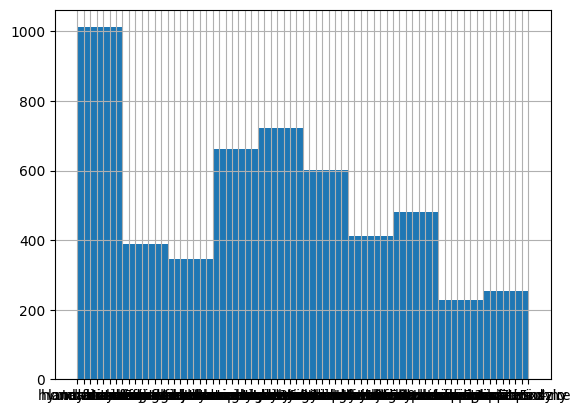

In [74]:
df10["Name"].hist()

In [75]:
dfn=pd.get_dummies(df10['Name'],dtype=int)

In [76]:
df11=pd.concat((df10,dfn),axis=1)

In [77]:
df12=df11.drop('Name',axis=1)

In [78]:
df12.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Diesel,Petrol,Automatic,...,tata indigo,tata nano,tata zest,toyota corolla,toyota etios,toyota fortuner,toyota innova,volkswagen jetta,volkswagen polo,volkswagen vento
0,17,60006,19.015923,1426.765178,88.793853,5.0,2.95,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,55001,15.719674,2088.100698,166.083638,7.0,26.50,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,115000,19.015923,1426.765178,88.793853,5.0,1.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16,69078,19.015923,1426.765178,88.793853,7.0,40.88,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,52146,19.015923,1426.765178,88.793853,5.0,1.93,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
m=df12['Mileage'].mean()
s=df12['Mileage'].std()

In [90]:
print(m-2*s)
print(m+2*s)

10.480596102551475
26.667704036054637


In [86]:
df12.dtypes

,0
Year,int64
Kilometers_Driven,int64
Mileage,float64
Engine,float64
Power,float64
...,...
toyota fortuner,int64
toyota innova,int64
volkswagen jetta,int64
volkswagen polo,int64


<Axes: >

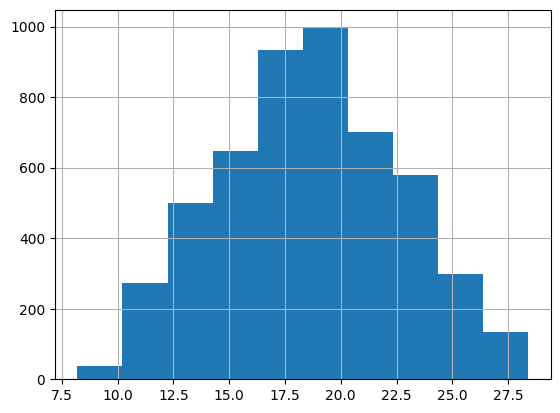

In [128]:
df12['Mileage'].hist()

<Axes: >

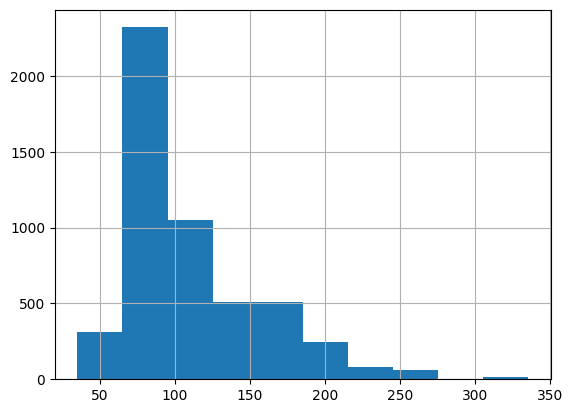

In [129]:
df12['Power'].hist()

<Axes: >

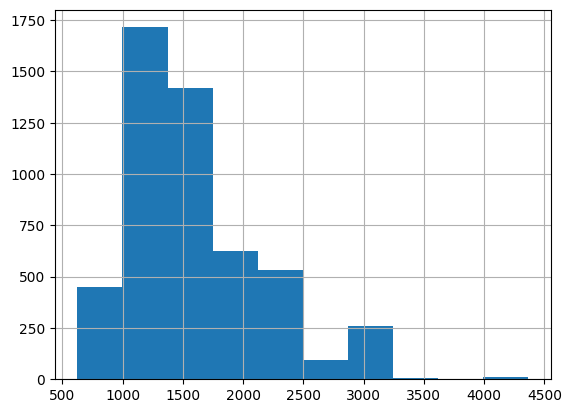

In [130]:
df12['Engine'].hist()

In [96]:
df13=df12[(df12['Mileage']>= (m-2*s)) & (df12['Mileage']<= (m+2*s))]

In [143]:
m=df13['Engine'].mean()
s=df13['Engine'].std()

In [144]:
print(m-2*s)
print(m+2*s)

490.11820202185413
2673.4624364611273


In [145]:
df14=df13[(df13['Engine']>= (m-2*s)) & (df13['Engine']<= (m+2*s))]

In [146]:
m=df14['Power'].mean()
s=df14['Power'].std()

In [147]:
print(m-2*s)
print(m+2*s)

28.33565548269867
177.49717747346807


In [148]:
df15=df14[(df14['Power']>= (m-2*s)) & (df14['Power']<= (m+2*s))]

In [149]:
x=df15.drop('Price',axis=1)
y=df15[['Price']]

In [150]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [151]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()

In [152]:
lmodel.fit(xtrain,ytrain)

LinearRegression()

In [153]:
ytrainp=lmodel.predict(xtrain)
ytestp =lmodel.predict(xtest)

In [154]:
print(abs(ytrain-ytrainp).mean())
print(abs(ytest-ytestp).mean())

Price    1.182488
dtype: float64
Price    1.192677
dtype: float64


In [157]:
np.hstack((ytest[['Price']].values,ytestp))

array([[5.2       , 5.86346332],
       [3.5       , 4.8044305 ],
       [3.29      , 3.36566441],
       ...,
       [2.75      , 3.17911439],
       [2.4       , 2.62259775],
       [2.3       , 1.2462242 ]])

<Axes: >

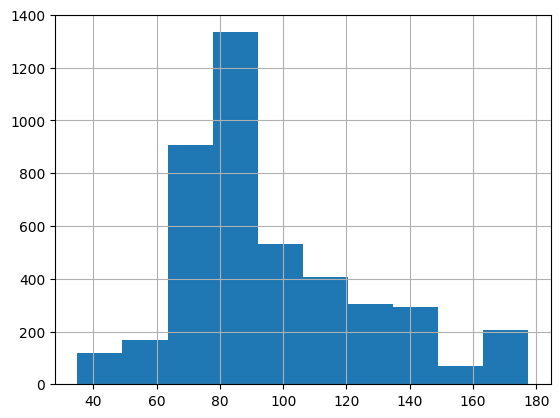

In [158]:
df15['Power'].hist()

<Axes: >

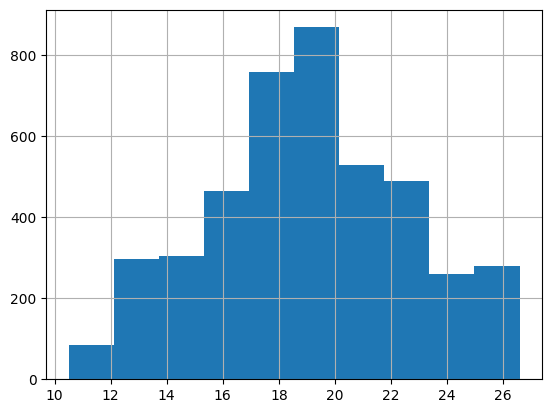

In [159]:
df15['Mileage'].hist()

<Axes: >

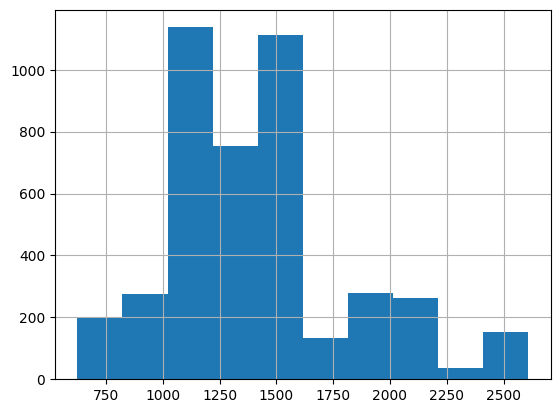

In [160]:
df15['Engine'].hist()

In [188]:
df7.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,honda city,Ahmedabad,17,60006,Petrol,Manual,First,19.015923,1426.765178,88.793853,5.0,2.95
1,land rover,Mumbai,16,55001,Diesel,Automatic,Second,15.719674,2088.100698,166.083638,7.0,26.50
2,honda city,Pune,20,115000,Petrol,Manual,Second,19.015923,1426.765178,88.793853,5.0,1.50
3,land rover,Coimbatore,16,69078,Petrol,Manual,First,19.015923,1426.765178,88.793853,7.0,40.88
4,hyundai santro,Coimbatore,20,52146,Petrol,Manual,First,19.015923,1426.765178,88.793853,5.0,1.93


In [162]:
xtrain.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Automatic,Manual,...,tata indigo,tata nano,tata zest,toyota corolla,toyota etios,toyota fortuner,toyota innova,volkswagen jetta,volkswagen polo,volkswagen vento
3340,14,84000,11.10,2354.0,142.0,5.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5159,6,38171,22.50,999.0,67.0,5.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3939,14,19119,18.90,998.0,67.1,5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4204,10,53900,14.16,1968.0,174.3,5.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1729,6,2500,15.29,1591.0,121.3,5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [201]:
name='maruti baleno'
location='Ahmedabad'
year=8
kms=50000
ftype='Petrol'
ttype='Automatic'
otype='First'
mileage=15
engine=1400
power=90
seats=5.0

In [202]:
print(xtrain.columns)
len(xtrain.columns)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Diesel', 'Petrol', 'Automatic', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore',
       'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune',
       'audi a4', 'audi a6', 'audi q3', 'audi q5', 'audi q7', 'bmw 3', 'bmw 5',
       'bmw x1', 'bmw x5', 'chevrolet beat', 'ford ecosport', 'ford endeavour',
       'ford fiesta', 'ford figo', 'honda accord', 'honda amaze', 'honda brio',
       'honda city', 'honda civic', 'honda cr-v', 'honda jazz',
       'hyundai creta', 'hyundai elantra', 'hyundai eon', 'hyundai grand',
       'hyundai i10', 'hyundai i20', 'hyundai santro', 'hyundai verna',
       'hyundai xcent', 'jaguar xf', 'land rover', 'mahindra scorpio',
       'mahindra xuv500', 'mahindra xylo', 'maruti alto', 'maruti baleno',
       'maruti celerio', 'maruti ciaz', 'maruti dzire', 'maruti ertiga',
       'maruti ritz', 'm

96

In [203]:
print(np.where(xtrain.columns=='Petrol')[0][0])

7


In [207]:
input= np.zeros(len(xtrain.columns))
input[0]=year
input[1]=kms
input[2]=mileage
input[3]=engine
input[4]=power
input[5]=seats

in_ftype= np.where(xtrain.columns== ftype)[0][0]
in_ttype= np.where(xtrain.columns== ttype)[0][0]
in_otype= np.where(xtrain.columns== otype)[0][0]
in_loc= np.where(xtrain.columns== location)[0][0]
in_car= np.where(xtrain.columns== name)[0][0]

input[in_ftype]=1
input[in_ttype]=1
input[in_otype]=1
input[in_loc]=1
input[in_car]=1

In [208]:
input

array([8.0e+00, 5.0e+04, 1.5e+01, 1.4e+03, 9.0e+01, 5.0e+00, 0.0e+00,
       1.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])

In [210]:
print(lmodel.predict([input]))

[[6.41383431]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [211]:
def predict_car_price(year,kms,mileage,engine,power,seats,ftype,ttype,otype,location,name):
    input= np.zeros(len(xtrain.columns))
    input[0]=year
    input[1]=kms
    input[2]=mileage
    input[3]=engine
    input[4]=power
    input[5]=seats

    in_ftype= np.where(xtrain.columns== ftype)[0][0]
    in_ttype= np.where(xtrain.columns== ttype)[0][0]
    in_otype= np.where(xtrain.columns== otype)[0][0]
    in_loc= np.where(xtrain.columns== location)[0][0]
    in_car= np.where(xtrain.columns== name)[0][0]

    input[in_ftype]=1
    input[in_ttype]=1
    input[in_otype]=1
    input[in_loc]=1
    input[in_car]=1

    return lmodel.predict([input])


In [214]:
print(predict_car_price(6,30000,14,1400,85,5,'Petrol','Manual','First','Delhi','toyota fortuner'))

[[9.64545714]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
